In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, accuracy_score, recall_score

In [8]:
df = pd.read_csv('Classified Data')

In [9]:
df.shape

(1000, 12)

In [10]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [12]:
df = df.drop('Unnamed: 0', axis=1)

In [16]:
df.sample(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
735,0.935630,1.439370,0.937152,0.705632,0.990910,0.963519,0.627081,1.633819,0.848357,1.383412,0
361,0.435756,1.129279,1.575248,0.919699,1.387816,1.092158,0.972639,0.839616,0.880535,1.357657,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [19]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


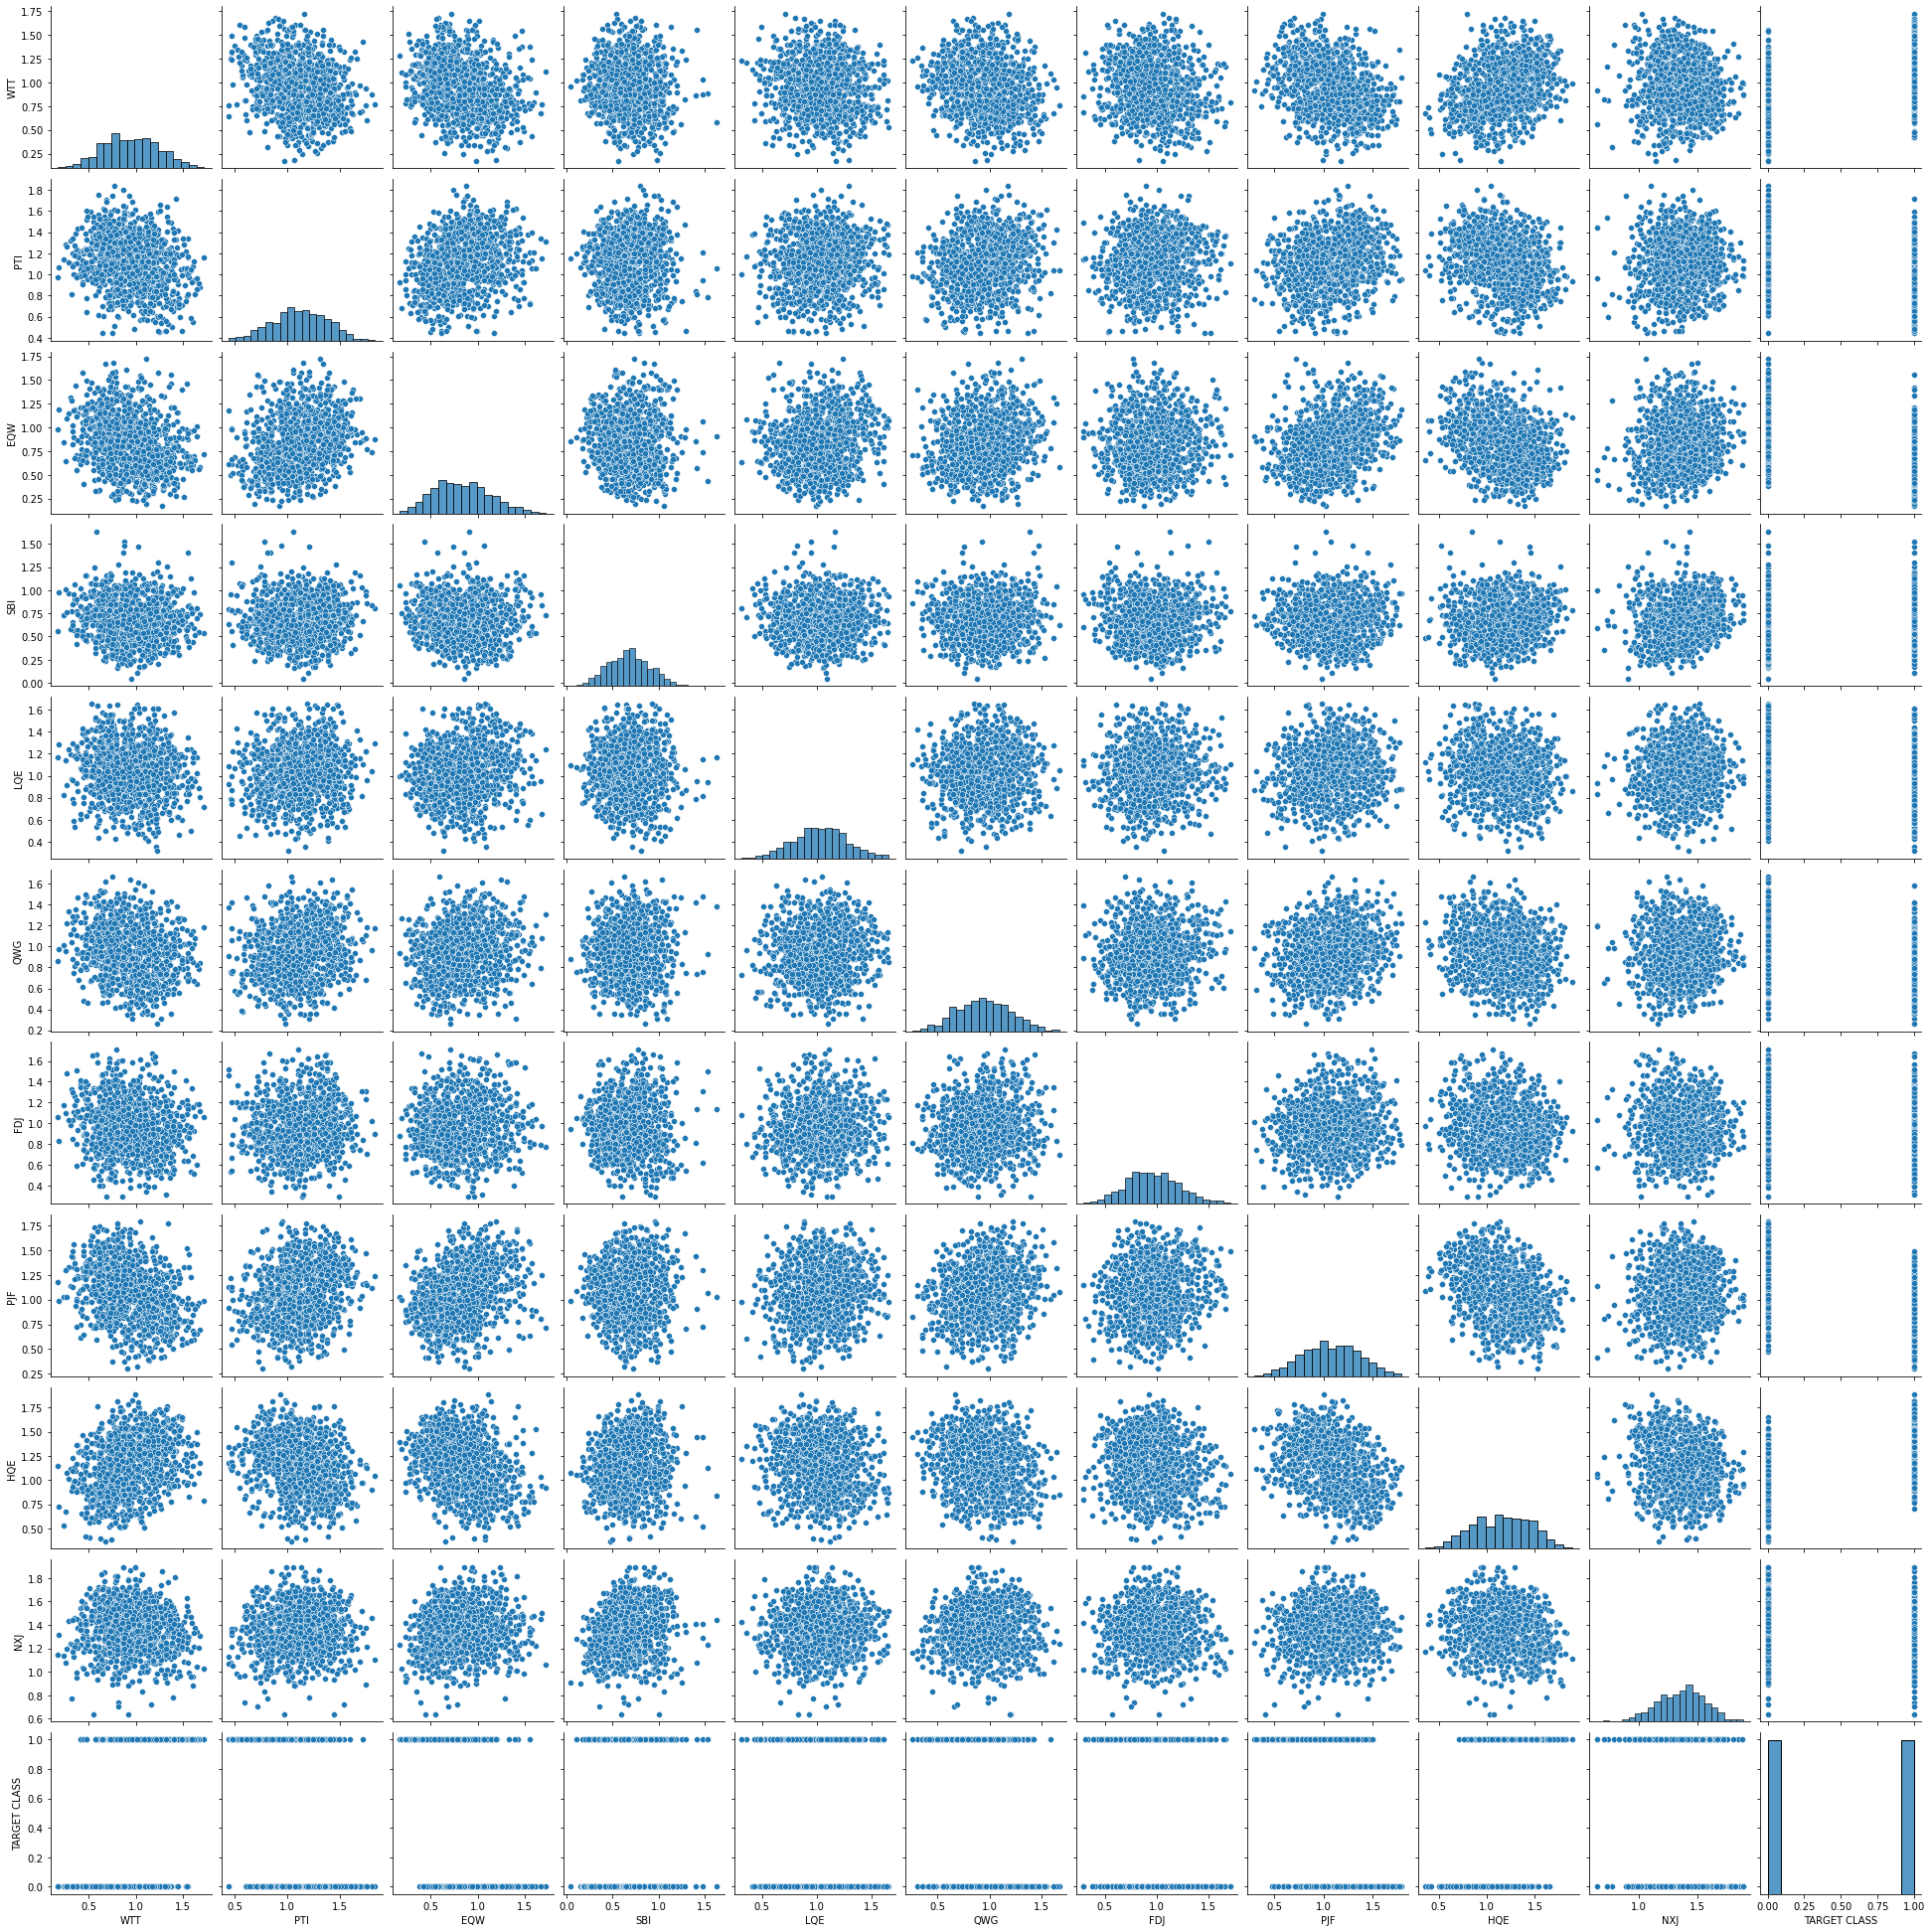

In [49]:
sns.pairplot(df)

<AxesSubplot:>

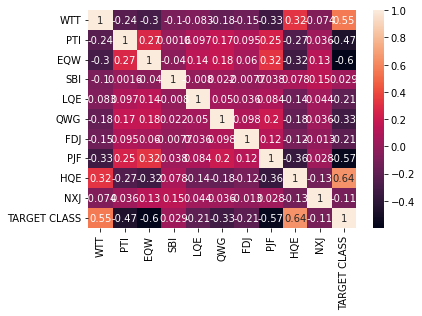

In [51]:
sns.heatmap(df.corr(), annot=True)

In [20]:
X = df.drop('TARGET CLASS', axis=1)

In [23]:
y = df['TARGET CLASS']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_2 = KNeighborsClassifier(n_neighbors=2)
model_3 = KNeighborsClassifier(n_neighbors=24)

In [28]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
print('score of k_neighbors=1: {0} \nscore of k_neighbors=2: {1} \nscore of k_neighbors=24: {2}'.format(model_1.score(X_train, y_train), model_2.score(X_train, y_train), model_3.score(X_train, y_train)))

score of k_neighbors=1: 1.0 
score of k_neighbors=2: 0.96375 
score of k_neighbors=24: 0.93875


In [29]:
y_train_pred = model_1.predict(X_train)

In [46]:
print('*'*60)
print('Classification Report: \n{0}'.format(classification_report(y_train, y_train_pred)))
print('*'*60)
print('Confusion Matrix: \n{0}'.format(confusion_matrix(y_train, y_train_pred)))
print('*'*60)
print('Accuracy: \n{0} %'.format(accuracy_score(y_train, y_train_pred)))
print('*'*60)
print('F1_score: \n{0} %'.format(f1_score(y_train, y_train_pred)))
print('*'*60)
print('Recall: \n{0} %'.format(recall_score(y_train, y_train_pred)))
print('*'*60)

************************************************************
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

************************************************************
Confusion Matrix: 
[[402   0]
 [  0 398]]
************************************************************
Accuracy: 
1.0 %
************************************************************
F1_score: 
1.0 %
************************************************************
Recall: 
1.0 %
************************************************************


In [53]:
y_test_pred = model_1.predict(X_test)

In [54]:
print('*'*60)
print('Classification Report: \n{0}'.format(classification_report(y_test, y_test_pred)))
print('*'*60)
print('Confusion Matrix: \n{0}'.format(confusion_matrix(y_test, y_test_pred)))
print('*'*60)
print('Accuracy: \n{0} %'.format(accuracy_score(y_test, y_test_pred)))
print('*'*60)
print('F1_score: \n{0} %'.format(f1_score(y_test, y_test_pred)))
print('*'*60)
print('Recall: \n{0} %'.format(recall_score(y_test, y_test_pred)))
print('*'*60)

************************************************************
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.92      0.94      0.93       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

************************************************************
Confusion Matrix: 
[[90  8]
 [ 6 96]]
************************************************************
Accuracy: 
0.93 %
************************************************************
F1_score: 
0.9320388349514563 %
************************************************************
Recall: 
0.9411764705882353 %
************************************************************


In [60]:
y_train_pred = model_3.predict(X_train)

In [61]:
print('*'*60)
print('Classification Report: \n{0}'.format(classification_report(y_train, y_train_pred)))
print('*'*60)
print('Confusion Matrix: \n{0}'.format(confusion_matrix(y_train, y_train_pred)))
print('*'*60)
print('Accuracy: \n{0} %'.format(accuracy_score(y_train, y_train_pred)))
print('*'*60)
print('F1_score: \n{0} %'.format(f1_score(y_train, y_train_pred)))
print('*'*60)
print('Recall: \n{0} %'.format(recall_score(y_train, y_train_pred)))
print('*'*60)

************************************************************
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       402
           1       0.92      0.96      0.94       398

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800

************************************************************
Confusion Matrix: 
[[370  32]
 [ 17 381]]
************************************************************
Accuracy: 
0.93875 %
************************************************************
F1_score: 
0.9395807644882861 %
************************************************************
Recall: 
0.957286432160804 %
************************************************************


In [62]:
y_test_pred = model_3.predict(X_test)

In [63]:
print('*'*60)
print('Classification Report: \n{0}'.format(classification_report(y_test, y_test_pred)))
print('*'*60)
print('Confusion Matrix: \n{0}'.format(confusion_matrix(y_test, y_test_pred)))
print('*'*60)
print('Accuracy: \n{0} %'.format(accuracy_score(y_test, y_test_pred)))
print('*'*60)
print('F1_score: \n{0} %'.format(f1_score(y_test, y_test_pred)))
print('*'*60)
print('Recall: \n{0} %'.format(recall_score(y_test, y_test_pred)))
print('*'*60)

************************************************************
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        98
           1       0.95      0.95      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

************************************************************
Confusion Matrix: 
[[93  5]
 [ 5 97]]
************************************************************
Accuracy: 
0.95 %
************************************************************
F1_score: 
0.9509803921568627 %
************************************************************
Recall: 
0.9509803921568627 %
************************************************************
